# FAIRe Qualitäts-KPIs
Autor: Daniel Burgos 
Datum: 23.10.2023

## Forschungsfrage
Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit:

Wie lassen sich KPIs unter Berücksichtigung der FAIR-Prinzipien entwickeln und vergleichen?

## Erstes Fahrzeug


### Versuchsziel
Formulieren Sie ein Versuchsziel für diesen ersten Versuch:

Ich möchte ein Fahrzeug bauen, dass mithelfe des Getriebes durch die reduzierte Drehzahl ein ruhiges Fahrverhalten aufweist.

### Versuchsaufbau

Bauen Sie ein erstes Fahrzeug aus den gegebenen LEGO-Teilen in der CAD-Software LeoCAD auf.

Hierbei gelten die folgenden Rahmenbedingungen:
- Das Fahrzeug muss aus Baugruppen, Bauteilen und Komponenten bestehen.
- Es muss mindestens vier Räder besitzen
- Es muss sich durch den elektrischen Antrieb fortbewegen können. 
- Die Verwendung eines Getriebes zwischen Motor und Antriebsachse(n) ist verpflichtend. 
- Die Farbe von mindestens einem Teil soll sich von der in LeoCAD hinterlegten Standardfarbe unterscheiden.
- Es sind nur die LEGO-Teile zu verwenden, welche sich in den JSON-Dateien bzw. in
der zur Verfügung gestellten Teilebibliothek befinden.

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu (*Hinweise: Ein Bild lässt sich mit \!\[Bildbeschreibung](/Pfad/zum/Bild) hinzufügen. Achten Sie darauf, das Bild später auch in Git hinzuzufügen*):


![Fahrzeug 1](figures/Fahrzeug_1.png)

Beschreiben Sie kurz und präzise Ihr Fahrzeug:

Das Fahrzeug besitzt einen Elektromotor, der über einem einstufigen Getriebe die Hinterradachse antreibt. Das Getriebe ist dabei so ausgelegt, dass das Drehmoment an der Hinterachse erhöht wird. Die Räder sind so gewählt, dass das zweite Zahnrad keinen kontakt zum Boden hat. Die Energieversorgung wird über eine wiederaufladbare Batterie gewähleistet. Die Breite des Fahrzeuges ist durch der nebeneinander angebrachten Frames erhöht.

Bauen Sie das Fahrzeug nun in unserem Software-Framework zusammen. Instanziieren Sie die LEGO-Teile und lesen Sie dabei auch die Eigenschaften ein. Ergänzen Sie zusätzliche Eigenschaften, wie z.B. die Farbe. Referenzieren Sie die Teile aufeinander und erstellen Sie auf diese Weise sinnvolle Bauteile, Baugruppen und das
Gesamtsystem. Nutzen Sie die hierfür bereitgestellten Klassendefinitionen und Methoden. Achten Sie auf eine gute Code-Dokumentation. Sie können sich für die Bearbeitung an den zur Verfügung gestellten Code-Zellen orientieren, können hiervon jedoch auch abweichen.

*Hinweise: Achten Sie auf die Unterschiede zum Minimalbeispiel. Eine direkte Kopie ist nicht möglich. Achten Sie außerdem darauf, ein Teil (eindeutig identifiziert durch seine UUID) nicht an mehreren Stellen zu verbauen*

In [20]:
import json
import pprint
from functions import calculation_rules
from functions.classes import *
import matplotlib.pyplot as plt 
import numpy as np 

In [21]:
# initialize componentens
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)
    drive_shaft = LegoComponent("drive shaft", axles["50451"])
    motor_shaft = LegoComponent("motor shaft", axles["32073"])
    
with open("datasheets/batteries.json") as json_file :
    batteries = json.load(json_file)
    main_batterie = LegoComponent("main batterie", batteries["2847c01"])

with open("datasheets/motors.json") as json_file :
    motors = json.load(json_file)
    motor = LegoComponent("motor",motors["8883-1"])
    
with open("datasheets/frame.json") as json_file :
    frames = json.load(json_file)
    left_frame = LegoComponent("left frame", frames["32532"])
    right_frame = left_frame.clone("right frame")
    frame_conector_back = LegoComponent("frame conector back", frames["32556"])
    frame_conector_front = frame_conector_back.clone("frame conector back")
    front_shaft_right = LegoComponent("front shaft right", frames["3749"])
    front_shaft_left = front_shaft_right.clone("front shaft left")
    spacer = LegoComponent("spacer", frames["3713"])
    
with open("datasheets/gears.json") as json_file :
    gears = json.load(json_file)
    first_gear = LegoComponent("first gear", gears["94925"])
    second_gear = LegoComponent("second gear", gears["32269"])
    
with open("datasheets/wheels.json") as json_file :
    wheels = json.load(json_file)
    back_wheel_right = LegoComponent("back wheel right", wheels["3482c01"])
    back_wheel_left = back_wheel_right.clone("back wheel left")
    front_wheel_right = back_wheel_right.clone("front wheel right")
    front_wheel_left = back_wheel_right.clone("front wheel left")

In [22]:
# set properties
# change wheel color
back_wheel_right.properties["color"] = "red"
back_wheel_left.properties["color"] = "red"
front_wheel_right.properties["color"] = "red"
front_wheel_left.properties["color"] = "red"

In [23]:
# aggregate components

# aggregate frame
frame_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "frame assembly")
frame_assembly.add([left_frame, right_frame, frame_conector_back, frame_conector_front])

# aggregate transmission
transmission_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "transmission assembly")
transmission_assembly.add([first_gear,second_gear,motor_shaft])

# aggregate undercarriage
undercarriage_assembly = LegoAssembly(AggregationLayer.ASSEMBLY, "undercarriage assembly")
undercarriage_assembly.add([back_wheel_right, back_wheel_left, front_wheel_right,front_wheel_left, 
                            spacer, drive_shaft, front_shaft_right, front_shaft_left])

# aggreagate drive_assembly
drive_assembly = LegoAssembly(AggregationLayer.ASSEMBLY)
drive_assembly.add([motor, main_batterie, transmission_assembly])

# aggregate vehicle

vehicle_1 = LegoAssembly(AggregationLayer.SYSTEM)
vehicle_1.add([frame_assembly, undercarriage_assembly, drive_assembly])

### Analyse
Bestimmen Sie die Qualität Ihres Fahrzeugs mittels KPIs.
Die Qualität des Fahrzeugs ist mit mindestens einem KPI je Qualitätsdimension (Aufwand, Verfügbarkeit, Akzeptanz) zu bestimmen. Enwickeln Sie zunächst sinnvolle KPIs, welche mit den gegebenen Daten umsetzbar sind. Halten Sie die Berechnungsvorschriften im Jupyter Notebook fest. Implementieren Sie deren Berechnung für das Gesamtsystem "Fahrzeug" mittels einzelner Funktionen im Skript `calculation_rules`. Sie können zusätzlich Ihre Methoden auch auf die niedrigeren Aggregationsebenen anwenden.

Beschreiben Sie den jeweiligen KPI und geben Sie seine Berechnungsvorschrift an:

Als KPI für die Qualitätsdimension "Aufwand" wird der finanzielle Aufwand des Fahrzeugs verglichen. Einprodukt, dass für einen Kunden nicht finanzierbar ist, wird nicht bezogen. Dieser setzt sich aus den Einzelpreisen der einzelnen Komponenten zusammen und berechnet sich wie folgt.

$$
Gesamtpreis = \sum_{i=1}^N Komponentenpreis_i
$$


Als KPI für die Verfügbarkeit ziehe ich die Lieferzeit für das vollständige Fahrzeug heran. Diese wird bestimmt aus der maximalen Lieferzeit aus den einzelnen komponenten.

$$
Lieferzeit = \max[Lieferzeit_i]
$$


ALs KPI für die Aktzeptanz ziehe ich das Gesammtgewicht des Fahrzeugs heran. Das Gewicht ist wichtig für ein stabiles Fahrverhalten und und ein robusteres Fahrzeug. Dadurch bleibt der Bodenkontakt besser aufrecht. 

$$
Gesamtgewicht = \sum_{i=1}^N Komponentengewicht_i
$$


Halten Sie die berechneten Werte für die KPIs im Notebook
fest:

In [24]:
# calculate the KPIs for your car

# calculate total price KPI
total_price_1 = calculation_rules.kpi_price(vehicle_1)

# calculate maximal delivery time KPI
delivery_time_1 = calculation_rules.kpi_delivery_time(vehicle_1)     

# calculate weight KPI
total_weight_1 = calculation_rules.kpi_weight(vehicle_1)

In [25]:
# print your KPIs

# print price KPI
print("Der gesammte Preis beträgt",total_price_1,"€")

# print delivery time KPI
print("Die längste Lieferzeit beträgt",delivery_time_1,"days")

# print weight KPI
print("Das Gesammtgewicht beträgt",total_weight_1,"gramm")

Der gesammte Preis beträgt 23.941 €
Die längste Lieferzeit beträgt 13 days
Das Gesammtgewicht beträgt 241.90999999999997 gramm


Exportieren Sie schließlich Ihr entworfenes Fahrzeug inklusive der entwickelten KPIs:

In [26]:
# export car and its properties
vehicle_1.properties["price [€]"] = total_price_1
vehicle_1.properties["delivery time [days]"] = delivery_time_1
vehicle_1.properties["weight [g]"] = total_weight_1
with open("vehicle_1.json", "w") as fp:
    json.dump(vehicle_1.to_dict(), fp, cls=KPIEncoder, indent=4)

## Zweites Fahrzeug

### Versuchsziel

Setzen Sie sich ein Ziel, welche Qualitätsdimensionen in einem zweiten Fahrzeug verbessert werden sollen und bauen
Sie darauf aufbauend ein zweites Fahrzeug aus den gegebenen LEGO-Teilen auf.
Die Anforderungen an das Fahrzeug sind identisch zum ersten. Wählen Sie die Einzelteile und deren Zusammenspiel entsprechend Ihrer Zielstellung aus.

Formulieren Sie ein Versuchsziel für diesen Versuch. Beschreiben Sie unter anderem, welche Verbesserung Sie vornehmen möchten:

Das zu konstruierende Fahrzeug soll ein stabileres Fahrverhalten aufweißen. Deshalb soll das Getriebe erweitert werden um die Drehzahl zu reduzieren und das Gewicht des Fahrzeugs erhöht werden. Durch die Erhöhung des Gewichts wird der Anpressdurck des Fahrzeugs auf den Boden erhöht. Durch diese beiden Anpassungen soll die Fahrruhe des und Fahrstabilität des Fahrzeugs erhöht werden.

### Versuchsaufbau

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu:

![Fahrzeug 2](figures/Fahrzeug_2.png)

Beschreiben Sie kurz und präzise den Aufbau des zweiten Fahrzeugs:

Das Fahrzeug besitzt einen Elektromotor, der über einem zweistufiges Getriebe die Hinterradachse antreibt. Das Getriebe ist dabei so ausgelegt, dass das Drehmoment an der Hinterachse erhöht wird. Die Räder sind so gewählt, dass das vierte Zahnrad keinen kontakt zum Boden hat. Die Vorderräder sind um kosten zu sparen kleiner ausgelegt.Um genügen Bauraum für ein großes Gertiebe zu gewährleisten, ist die Höhe des Fahrzeugs erweitert worden. Der Radabstand ist durch zwei aneinander liegenden Frames verbreitert. Die Energieversorgung wird über eine wiederaufladbare Batterie gewähleistet. 

Erstellen Sie das Fahrzeug in unserem Softwareframework:

In [27]:
# initialize componentens
with open("datasheets/axles.json") as json_file:
    axles = json.load(json_file)
    motor_shaft = LegoComponent("motor shaft", axles["32073"])
    transmission_shaft = LegoComponent("transmission shaft", axles["32073"])
    first_drive_shaft = LegoComponent("first drive shaft", axles["44294"])
    second_drive_shaft = LegoComponent("second drive shaft", axles["3708"])
    
with open("datasheets/batteries.json") as json_file :
    batteries = json.load(json_file)
    main_batterie = LegoComponent("main batterie", batteries["2847c01"])
    
with open("datasheets/motors.json") as json_file :
    motors = json.load(json_file)
    motor = LegoComponent("motor",motors["8883-1"])

with open("datasheets/frame.json") as json_file :
    frames = json.load(json_file)
    first_left_frame = LegoComponent("first left frame", frames["32532"])
    first_right_frame = first_left_frame.clone("first right frame")
    second_left_frame = first_left_frame.clone("second_left_frame")
    second_right_frame = first_left_frame.clone("second_right_frame")
    third_left_frame = first_left_frame.clone("third_left_frame")
    third_right_frame = first_left_frame.clone("third_right_frame")
    frame_conector_back = LegoComponent("frame conector back", frames["32556"])
    frame_conector_front = frame_conector_back.clone("frame conector front")
    drive_shaft_joiner = LegoComponent("drive shaft joiner", frames["6538"])
    front_shaft_right = LegoComponent("front shaft right", frames["3749"])
    front_shaft_left = front_shaft_right.clone("front shaft left")
    transmission_shaft_stop = LegoComponent("transmission shaft stop", frames["32123"])
    
with open("datasheets/gears.json") as json_file :
    gears = json.load(json_file)
    first_gear = LegoComponent("first gear", gears["3647"])
    second_gear = LegoComponent("second gear", gears["32498"])
    third_gear = first_gear.clone("third gear")
    fourth_gear = second_gear.clone("fourth gear")
    
with open("datasheets/wheels.json") as json_file :
    wheels = json.load(json_file)
    back_wheel_right = LegoComponent("back wheel right", wheels["41896c04"])
    back_wheel_left = back_wheel_right.clone("back wheel left")
    front_wheel_right = LegoComponent("front wheel right", wheels["3482c01"])
    front_wheel_left = front_wheel_right.clone("front wheel left")
    

In [28]:
# set properties
front_wheel_right.properties["color"] = "red"
front_wheel_left.properties["color"] = "red"


In [29]:
# aggregate components
frame_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "frame assembly")
frame_assembly.add([first_left_frame,second_left_frame,third_left_frame, 
                    first_right_frame,second_right_frame, third_right_frame, frame_conector_back, 
                    frame_conector_front])

# aggregate transmission
transmission_assembly = LegoAssembly(AggregationLayer.SUBASSEMBLY, "transmission assembly")
transmission_assembly.add([first_gear, second_gear, third_gear, fourth_gear, 
                           transmission_shaft, transmission_shaft_stop, motor_shaft])

# aggregate undercarriage
undercarriage_assembly = LegoAssembly(AggregationLayer.ASSEMBLY, "undercarriage assembly")
undercarriage_assembly.add([back_wheel_right, back_wheel_left, front_wheel_right, front_wheel_left, front_shaft_right, front_shaft_left, first_drive_shaft, second_drive_shaft, drive_shaft_joiner])

# aggregate drive
drive_assembly = LegoAssembly(AggregationLayer.ASSEMBLY)
drive_assembly.add([motor, main_batterie, transmission_assembly])

# aggregate vehicle
vehicle_2 = LegoAssembly(AggregationLayer.SYSTEM)
vehicle_2.add([frame_assembly, undercarriage_assembly, drive_assembly])

### Analyse
Bestimmen Sie die KPIs des zweiten Fahrzeugs

In [30]:
# calculate the KPIs for your car

# calculate total price KPI
total_price_2 = calculation_rules.kpi_price(vehicle_2)

# calculate maximal delivery time KPI
delivery_time_2 = calculation_rules.kpi_delivery_time(vehicle_2)     

# calculate weight KPI
total_weight_2 = calculation_rules.kpi_weight(vehicle_2)

In [31]:
# print your KPIs

# print price KPI
print("Der gesammte Preis beträgt",total_price_2,"€")

# print delivery time KPI
print("Die längste Lieferzeit beträgt",delivery_time_2,"days")

# print weight KPI
print("Das Gesammtgewicht beträgt",total_weight_2,"gramm")

Der gesammte Preis beträgt 26.332 €
Die längste Lieferzeit beträgt 12 days
Das Gesammtgewicht beträgt 320.56000000000006 gramm


Exportieren Sie Ihr Fahrzeug inklusive der KPIs:

In [32]:
# export car and its properties
vehicle_2.properties["price [€]"] = total_price_2
vehicle_2.properties["delivery time [days]"] = delivery_time_2
vehicle_2.properties["weight [g]"] = total_weight_2

with open("vehicle_2.json", "w") as fp:
    json.dump(vehicle_2.to_dict(), fp, cls=KPIEncoder, indent=4)

## Diskussion
### Ergebnisse
Stellen Sie die entwickelten KPIs beider Fahrzeuge gegenüber und wählen Sie hierfür unter anderem eine geeignete
grafische Darstellung. Stellen Sie dabei insbesondere sicher, dass die Datengrundlage ersichtlich ist. Halten Sie
auch die Plotbefehle im Notebook fest:

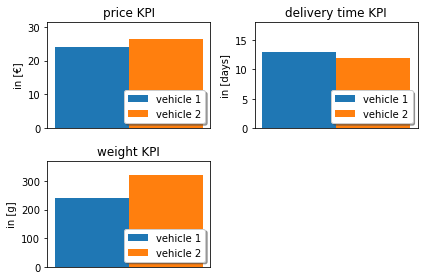

<Figure size 432x288 with 0 Axes>

In [33]:
# plot the data, save diagramm as svg-file


width = 0.2
# create figure
fig = plt.figure()

# create subplot
ax1 = fig.add_subplot(221)

# plot diagram
v_1 =plt.bar(1-(width/2), total_price_1, width)
v_2 =plt.bar(1+(width/2),total_price_2, width)


# adjust axis
ax1.set_ylabel('in [€]')
ax1.get_xaxis().set_visible(False)
plt.ylim(0,(max(total_price_1,total_price_2)+5))

# add title and legend
ax1.title.set_text('price KPI')
ax1.legend((v_1, v_2), ('vehicle 1', 'vehicle 2'), loc='lower right', shadow=True)

# create subplot
ax2 = fig.add_subplot(222)

# plot diagram
v_1 =plt.bar(1-(width/2), delivery_time_1, width)
v_2 =plt.bar(1+(width/2),delivery_time_2, width)

# adjust axis
ax2.set_ylabel('in [days]')
ax2.get_xaxis().set_visible(False)
plt.ylim(0,(max(delivery_time_1,delivery_time_2)+5))

# add title and legend
ax2.title.set_text('delivery time KPI')
ax2.legend((v_1, v_2), ('vehicle 1', 'vehicle 2'), loc='lower right', shadow=True)

# create subplot
ax3 = fig.add_subplot(223)

# plot diagram
v_1 = plt.bar(1-(width/2), total_weight_1, width)
v_2 = plt.bar(1+(width/2), total_weight_2, width)

# adjust axis
ax3.set_ylabel('in [g]')
ax3.get_xaxis().set_visible(False)
plt.ylim(0,(max(total_weight_1,total_weight_2)+50))

# add title and legend
ax3.title.set_text('weight KPI')
ax3.legend((v_1, v_2), ('vehicle 1', 'vehicle 2'), loc='lower right', shadow=True)

# show plot
fig.tight_layout()
plt.show()

# save and export plot
plt.savefig("data_plot.svg")


Interpretieren Sie Ihre Ergebnisse. Vergleichen Sie die KPIs Ihrer Autos. Konnten Sie Ihre gewünschte Verbesserung erzielen? Welche Schlüsse ziehen Sie aus den Ergebnissen für die Qualität der beiden
Fahrzeuge?

An den Grafiken kann mann gut sehen, dass sich der Preis des zweiten Fahrzeugs im vergleich zum ersten Fahrzeug erhöht hat. Dies ist wahrscheinlich darafu zurückzuführen, dass identische Komponente des ersten Fahrzeugs mehrfach im zweiten Fahrzeug verwendet wurden. Die Gesammtliefertzeit des zweiten Fahrzeugs hat sich verringert, wahrscheinlich, da eine Komponente mit einer höheren Lieferzeit im zweiten Fahrzeug ersetzt wurde.
Das Gewicht des zweiten Fahrzeugs hat sich, wie durch die höhere Anzahl der Komponente zu erwarten war, erhöht. Daraus ist zu schließen, dass sich die Qualität des Fahrverhaltens, gemessen am Gewicht und daraus resultierenden höheren Anpressdruck des zweiten Fahrzeugs erhöht hat.

Diskutieren Sie, inwieweit Ihre entwickelten KPIs die im Skript erläuterten FAIR-Prinzipien erfüllen:

Die einzelnen Komponente, Baugruppen und Fahrzeuge sind durch einzigartige Identifikatoren eindeutig. Die von mir verwendeten Metadaten können aus den einzelnen Komponenten und Fahrzeugen ausgelesen werden. Auch die verwendeten KPIs sind den Fahrzeugen eindeutig zugeordnet uns somit auffindbar.
Die entwickelten KPIs können auf jedes anderweitige zusammengestelltes System angewand werden. Ihre Berechnungsforschrift wurden weiter oben im Text erklärt und die Fahrzeuge sind exportiert worden. Dadurch ist die Zugänglichkeit der KPIs gewährleisten, auch wenn die ursprünglichen Daten unzugänglich sein sollten.
Die KPIs sind verständlich entwickelt worden und in verbreiteten Formaten und Sprache abgelegt. Dadurch ist ihre Interoperabilität, auch von Themenfremden gewährleistet.
Die KPIs und die damit verbundenen Metadaten  sind eindeutig mit relevanten Atributen beschrieben, die eine signifikante relevanz für weitere Projekte haben. Lediglich das KPI Gewicht bedarf einer genauen deutung hinsichtlich der Wertung im Umfeld der Qualität, da für andere Bergündungen dieses KPI auch anders gewertet werden kann und nicht zwangsläufig eine Verbesserung bewirkt.

## Fazit

Ziehen Sie ein persönliches Fazit. Was haben Sie Neues gelernt?

Das entwickeln der KPIs unter Berücksichtigung der FAIR-Prinzipien war sehr interesannt. Mir war nicht bewusst, was für eine gr0ße Auswahl an KPIs für die verschiedenen Qualitätsdimmensionen theoretisch möglich sind. Praktisch habe ich dann schnell realisiert, das die theoretisch möglichen KPIs stark von den zur Verfügung stehenden Daten begrenzt werden. So habe ich zum Beispiel viel Zeit darauf aufgewand, die Zugkraft der Fahrzeuge als KPI zu erfassen. Diesen Ansatz musste ich allerdings, nach Erkundigung im HelpDesk, aufgrund des Aufwands verwerfen.
